<a href="https://colab.research.google.com/github/faiza141/amazon-clone/blob/main/StudentLifestyleDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"faiza141","key":"051397ee103998d48a7b6f72812cb4fc"}'}

In [ ]:
!mkdir -p ~/.kaggle


In [ ]:
!mv kaggle.json ~/.kaggle/



In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle


In [ ]:
!kaggle datasets list -s "dataset_name"


ref                                                       title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rajugc/kaggle-dataset                                     Kaggle Dataset                                        1MB  2023-02-09 10:04:44           2742        106  1.0              
antaresnyc/human-metagenomics                             Human Metagenomics                                   72MB  2020-12-16 22:21:55           1144         32  0.9705882        
lyhongkhanh/dataset-name                                  dataset_name                                         632B  2024-05-04 10:45:32              0          0  0.0625           
rhijudas/rmdb-rna-mapping-database-2023-data              RMDB (RNA Mapping DataBase) 2023

In [ ]:
!kaggle datasets download -d steve1215rogg/student-lifestyle-dataset

Dataset URL: https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset
License(s): apache-2.0
  0% 0.00/21.6k [00:00<?, ?B/s]
100% 21.6k/21.6k [00:00<00:00, 36.3MB/s]


In [ ]:
!unzip student-lifestyle-dataset.zip -d ./data


Archive:  student-lifestyle-dataset.zip
  inflating: ./data/student_lifestyle_dataset.csv  


In [ ]:
!ls ./data


student_lifestyle_dataset.csv


In [ ]:
import pandas as pd

data = pd.read_csv("./data/student_lifestyle_dataset.csv")


print(data.head())



   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  
2  2.67          Low  
3  2.8

In [ ]:
data = pd.read_csv('./data/student_lifestyle_dataset.csv')
data.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [ ]:
# Dimensions of the dataset
print("Shape of the dataset:", data.shape)

# Column names and data types
print("Columns and Data Types:")
print(data.info())

# Summary statistics for numerical features
print("Summary Statistics:")
print(data.describe())

# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

# Check for unique values in each column
print("Unique Values:")
print(data.nunique())


Shape of the dataset: (2000, 8)
Columns and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB
None
Summary Statistics:
        Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  2000.000000          2000.000000                

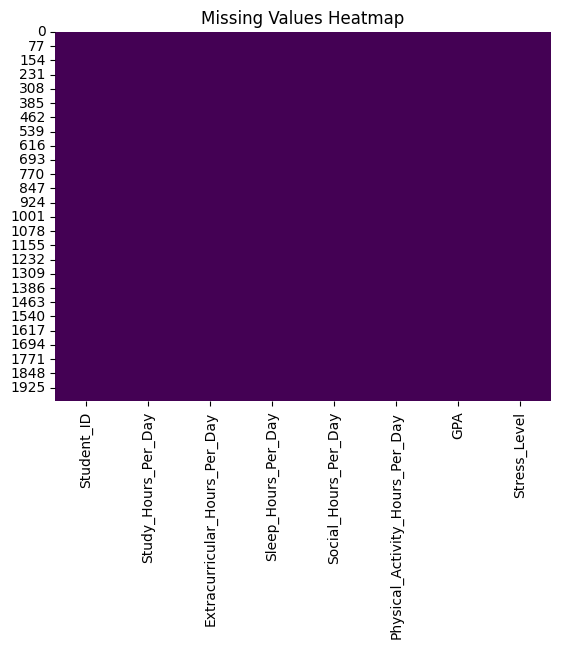

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()




In [ ]:
numeric_cols = data.select_dtypes(include=['number']).columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns

# Fill missing values for numeric columns with mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing values for non-numeric columns with the mode (most frequent value)
for col in non_numeric_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Print the updated DataFrame
print(data)


      Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0              1                  6.9                            3.8   
1              2                  5.3                            3.5   
2              3                  5.1                            3.9   
3              4                  6.5                            2.1   
4              5                  8.1                            0.6   
...          ...                  ...                            ...   
1995        1996                  6.5                            0.2   
1996        1997                  6.3                            2.8   
1997        1998                  6.2                            0.0   
1998        1999                  8.1                            0.7   
1999        2000                  9.0                            1.7   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
0                     8.7                   2.8   
1                     8.0        

<ipython-input-22-0bb8500470f8>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
print("Duplicate Rows:", data.duplicated().sum())
data.drop_duplicates(inplace=True)


Duplicate Rows: 0


In [ ]:
# Check the data types of the columns
print(data.dtypes)

# Select only the numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Display the first few rows of the numerical data
print(numerical_data.head())


Student_ID                           int64
Study_Hours_Per_Day                float64
Extracurricular_Hours_Per_Day      float64
Sleep_Hours_Per_Day                float64
Social_Hours_Per_Day               float64
Physical_Activity_Hours_Per_Day    float64
GPA                                float64
Stress_Level                        object
dtype: object
   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                     

In [ ]:
print(data.dtypes)

Student_ID                           int64
Study_Hours_Per_Day                float64
Extracurricular_Hours_Per_Day      float64
Sleep_Hours_Per_Day                float64
Social_Hours_Per_Day               float64
Physical_Activity_Hours_Per_Day    float64
GPA                                float64
Stress_Level                        object
dtype: object


In [ ]:
print(data.columns)


Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')


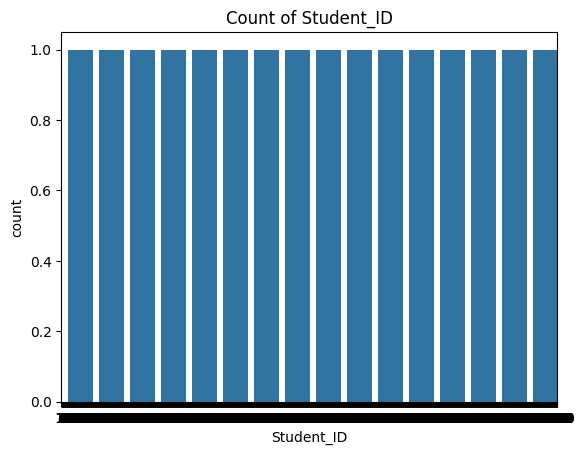

Student_ID
1       1
1330    1
1343    1
1342    1
1341    1
       ..
662     1
661     1
660     1
659     1
2000    1
Name: count, Length: 2000, dtype: int64


In [ ]:
sns.countplot(x='Student_ID', data=data)
plt.title("Count of Student_ID")
plt.show()

# Display the frequencies of each category
print(data['Student_ID'].value_counts())


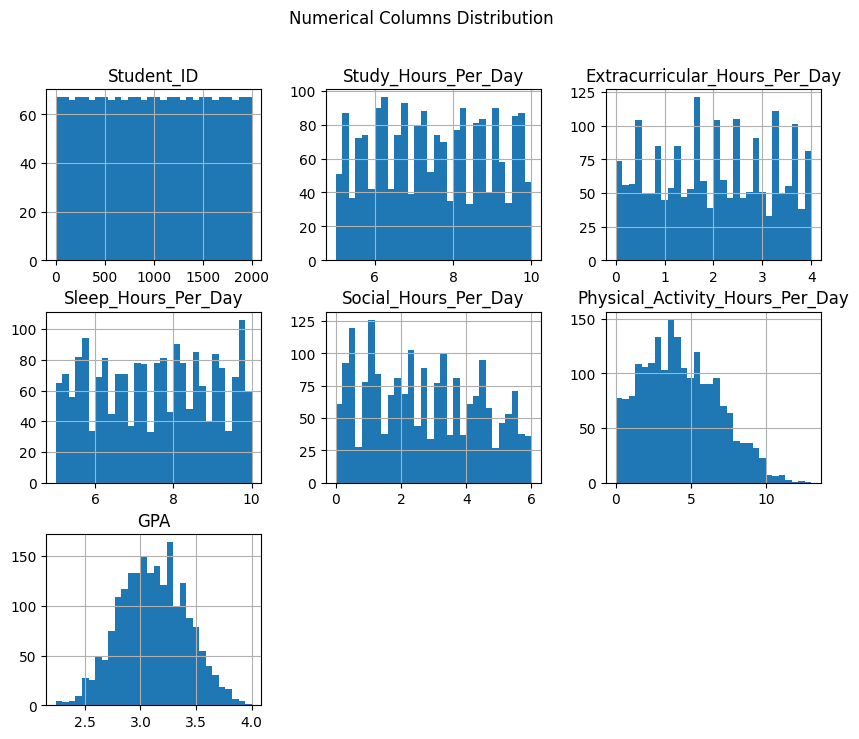

In [ ]:
# Distribution of numerical columns
data.hist(bins=30, figsize=(10, 8))
plt.suptitle("Numerical Columns Distribution")
plt.show()




In [ ]:
print(data.columns)


Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')


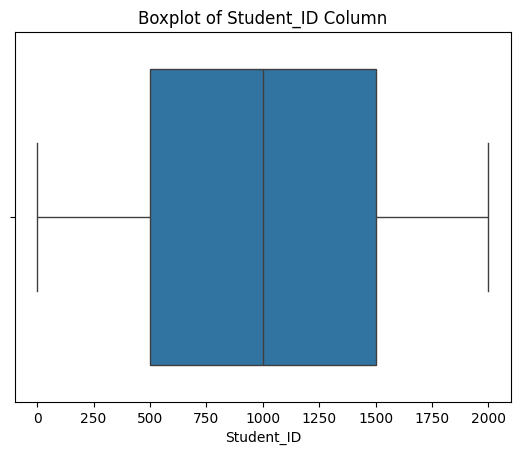

In [ ]:
sns.boxplot(x=data['Student_ID'])
plt.title("Boxplot of Student_ID Column")
plt.show()


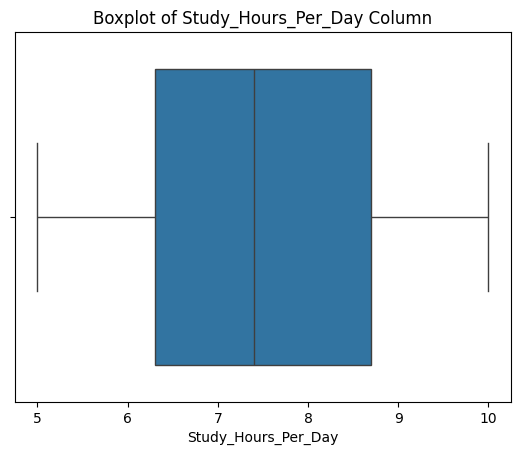

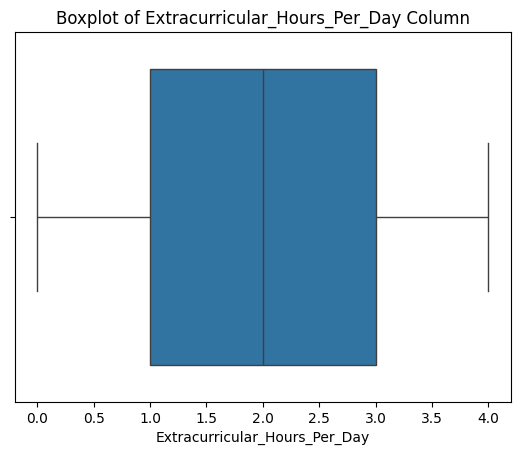

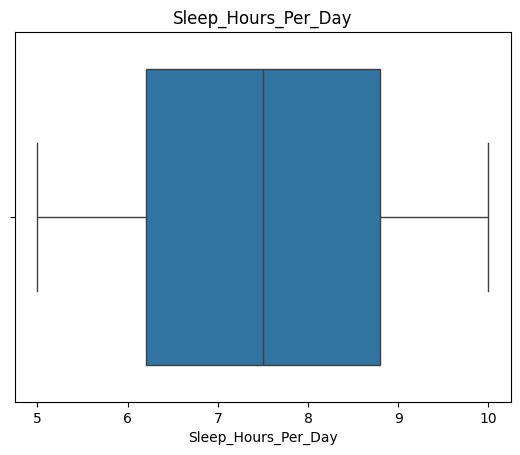

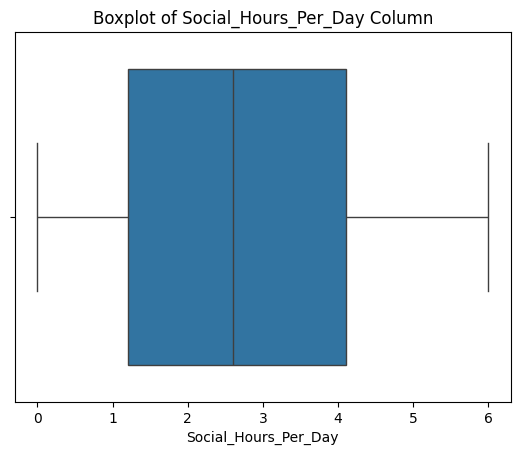

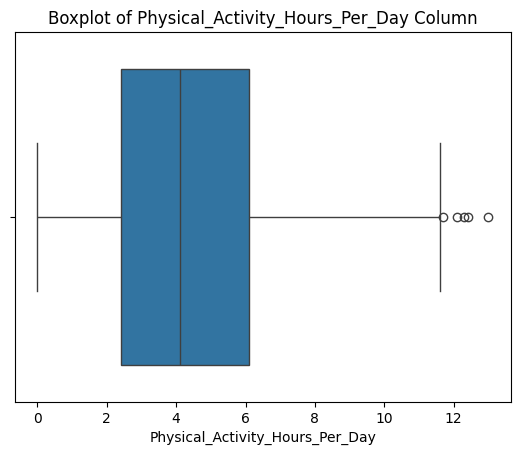

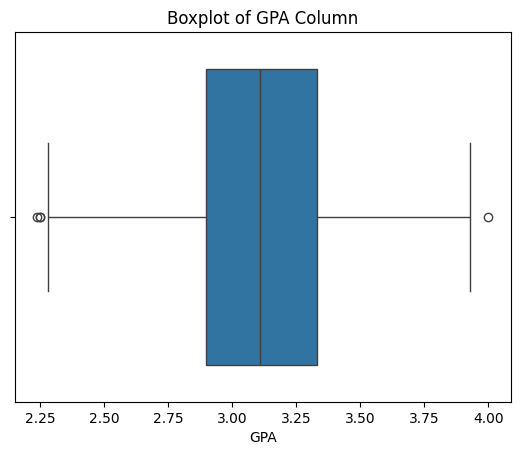

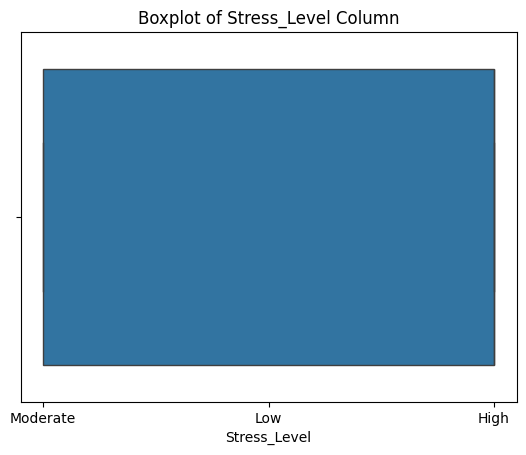

In [ ]:
sns.boxplot(x=data['Study_Hours_Per_Day'])
plt.title("Boxplot of Study_Hours_Per_Day Column")
plt.show()
sns.boxplot(x=data['Extracurricular_Hours_Per_Day'])
plt.title("Boxplot of Extracurricular_Hours_Per_Day Column")
plt.show()
sns.boxplot(x=data['Sleep_Hours_Per_Day'])
plt.title("Sleep_Hours_Per_Day")
plt.show()
sns.boxplot(x=data['Social_Hours_Per_Day'])
plt.title("Boxplot of Social_Hours_Per_Day Column")
plt.show()
sns.boxplot(x=data['Physical_Activity_Hours_Per_Day'])
plt.title("Boxplot of Physical_Activity_Hours_Per_Day Column")
plt.show()
sns.boxplot(x=data['GPA'])
plt.title("Boxplot of GPA Column")
plt.show()
sns.boxplot(x=data['Stress_Level'])
plt.title("Boxplot of Stress_Level Column")
plt.show()



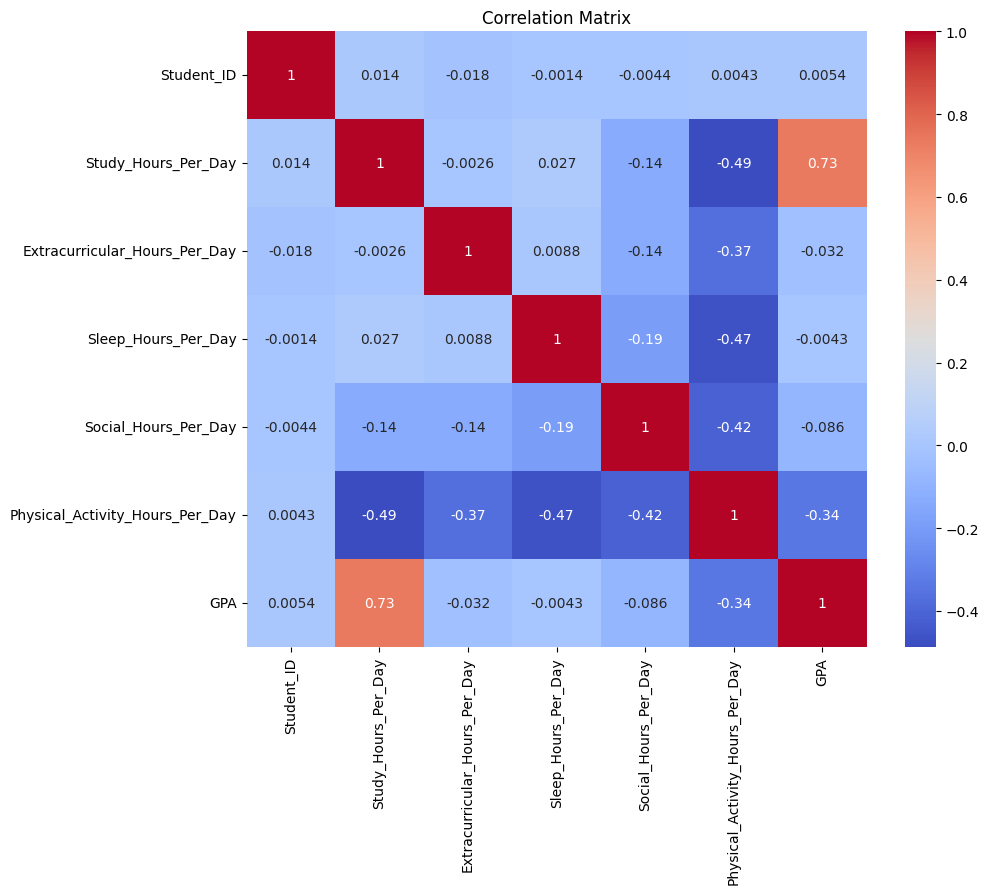

In [ ]:
numeric_data = data.select_dtypes(include=['number'])

correlation = numeric_data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


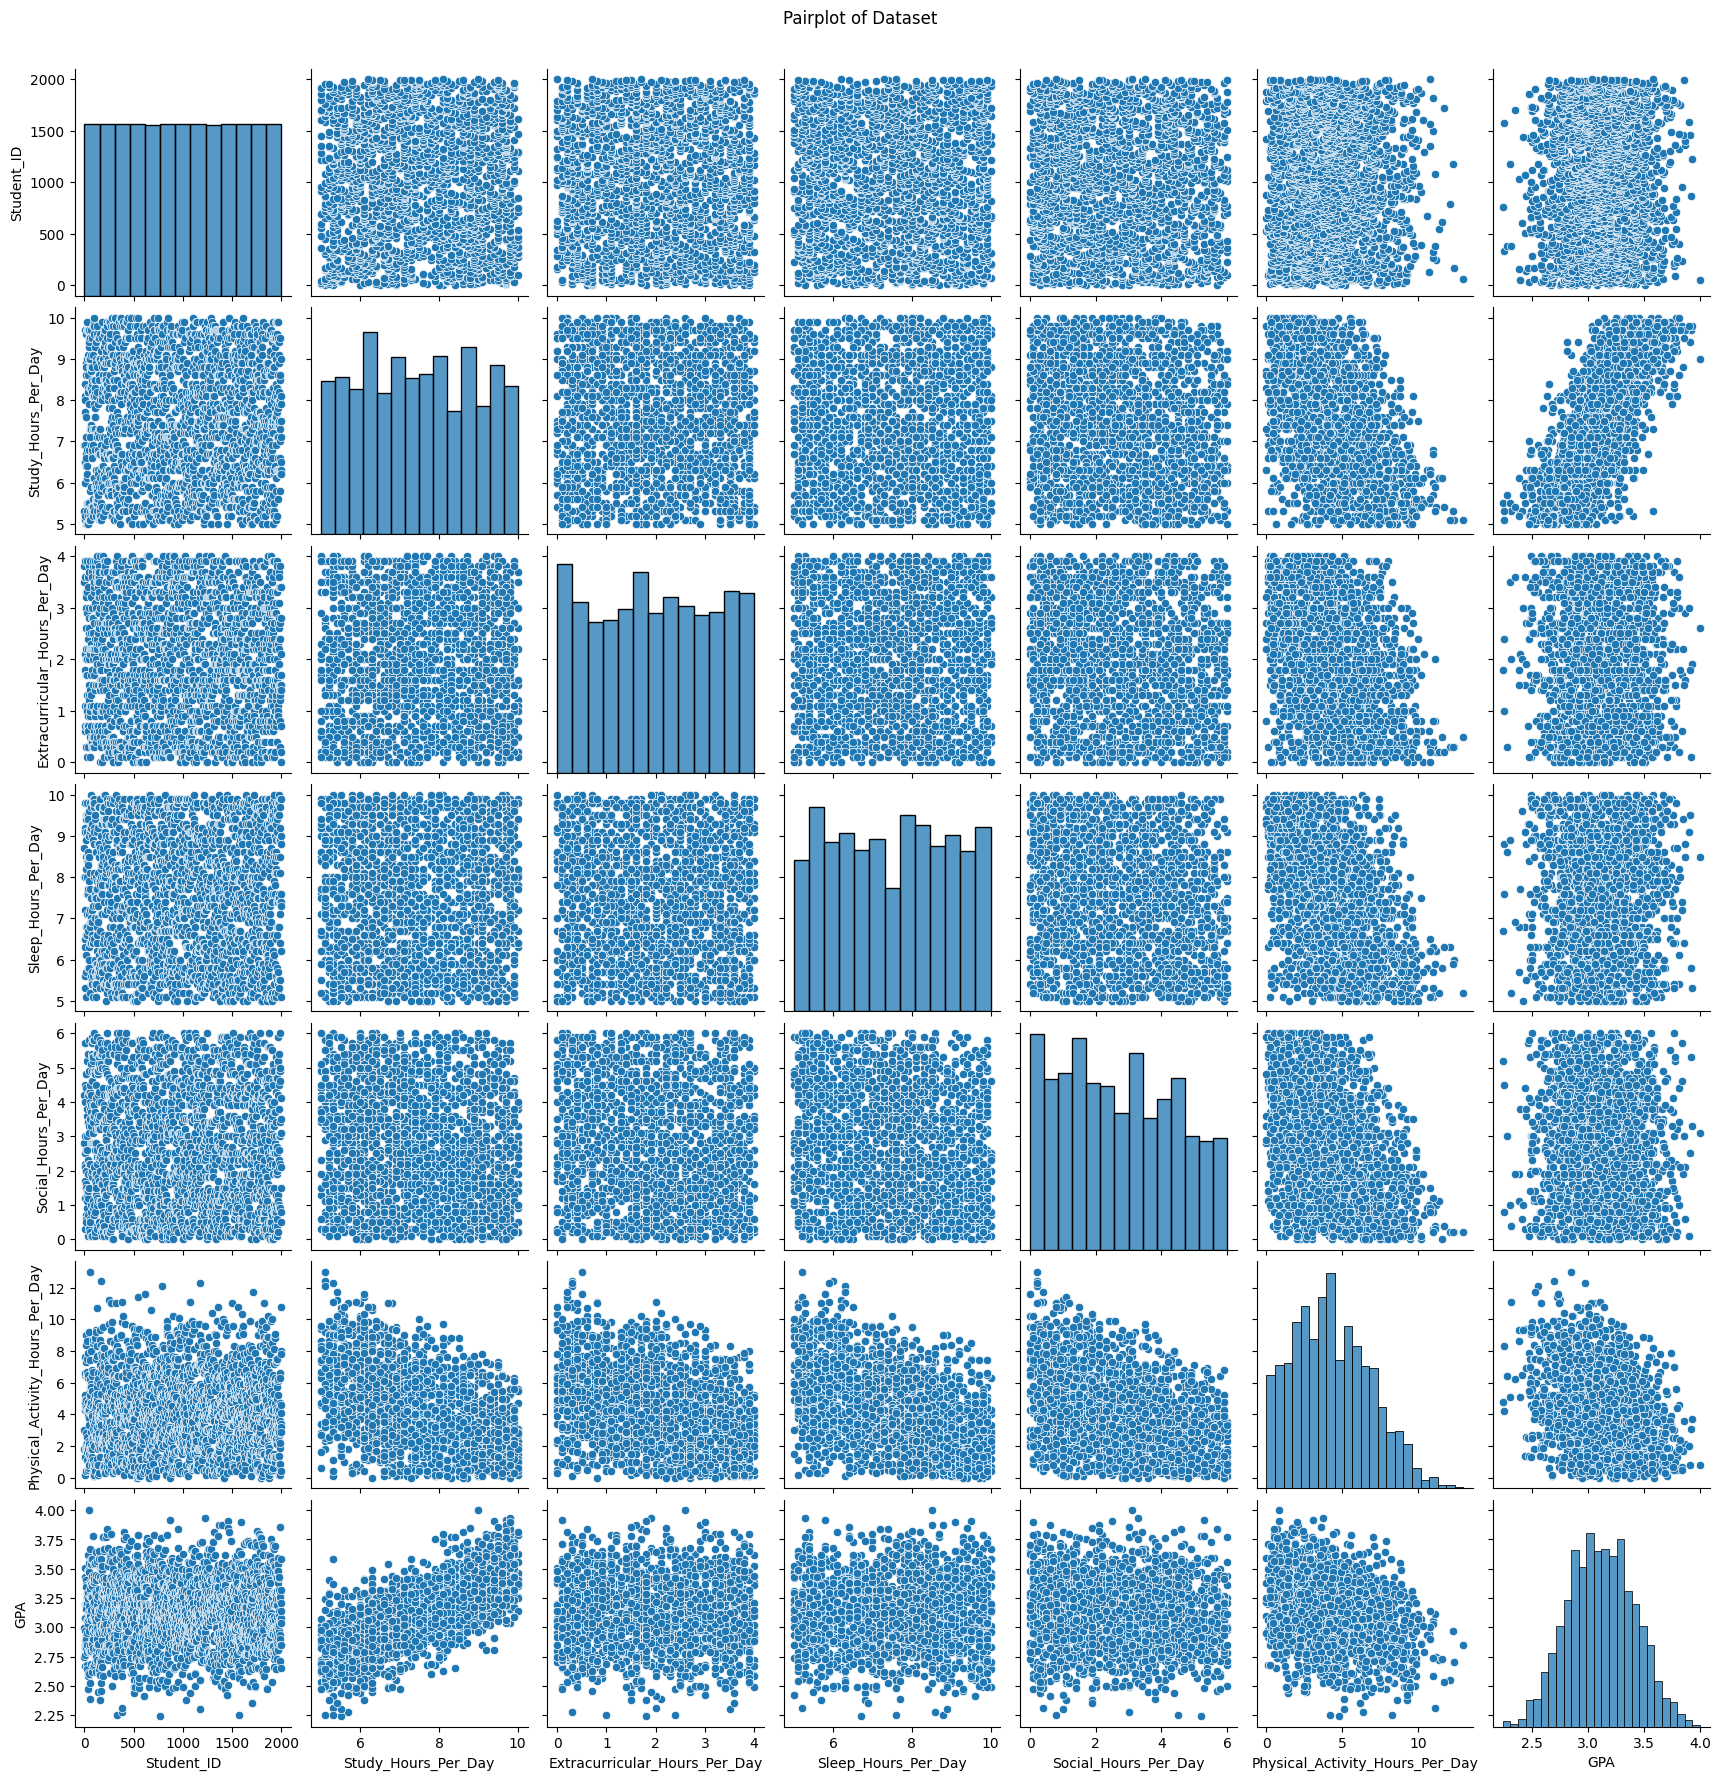

In [ ]:
sns.pairplot(data)
plt.suptitle("Pairplot of Dataset", y=1.02)
plt.show()


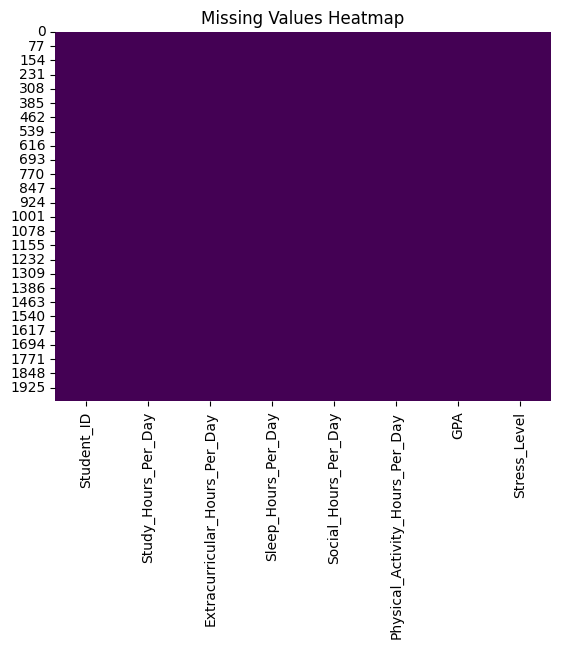

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

